<a href="https://colab.research.google.com/github/Abiola97/ajaoabiola0812/blob/main/Early%20Diabetes%20Detection%20%26%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing the dependencies
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler #Standarize the data
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Data collection and analysis

In [5]:
#Loading the diabetes dataset to pandas data frame
diabetes_dataset = pd.read_csv('/content/sample_data/diabetes.csv')

In [6]:
#Printing the first five rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
#number of rows and columns in this dataset
diabetes_dataset.shape

(768, 9)

In [8]:
#Getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_dataset['Outcome'].value_counts() # 0 means non-diabetic cases

,count
Outcome,
0,500
1,268


0 --> Non-diabetic
1 --> Diabetic

In [ ]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
# prompt: drop row if insulin or glucose ==0

# Remove rows where  'Glucose' is 0

diabetes_dataset = diabetes_dataset[diabetes_dataset['Glucose'] != 0]
diabetes_dataset = diabetes_dataset[diabetes_dataset['BloodPressure'] != 0]


In [ ]:
#Separating data and labels
X = diabetes_dataset.drop(columns='Outcome',axis=1)
y = diabetes_dataset['Outcome']

In [ ]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Data standrization

In [ ]:
scaler = StandardScaler()   #Taking one instance of this standard scaler function

In [ ]:
scaler.fit(X) #

StandardScaler()

In [ ]:
standardized_data = scaler.transform(X) #transforming the data into a common range

In [ ]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:

print(type(standardized_data))


<class 'numpy.ndarray'>


In [ ]:
X = standardized_data
y = diabetes_dataset['Outcome']

In [ ]:
print(X)
print(y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Train test split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=2)
#We've used stratify because it may that all the diabetic cases go to the X train and non diabetic go to the X test

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(768, 8) (614, 8) (154, 8)


Training the model

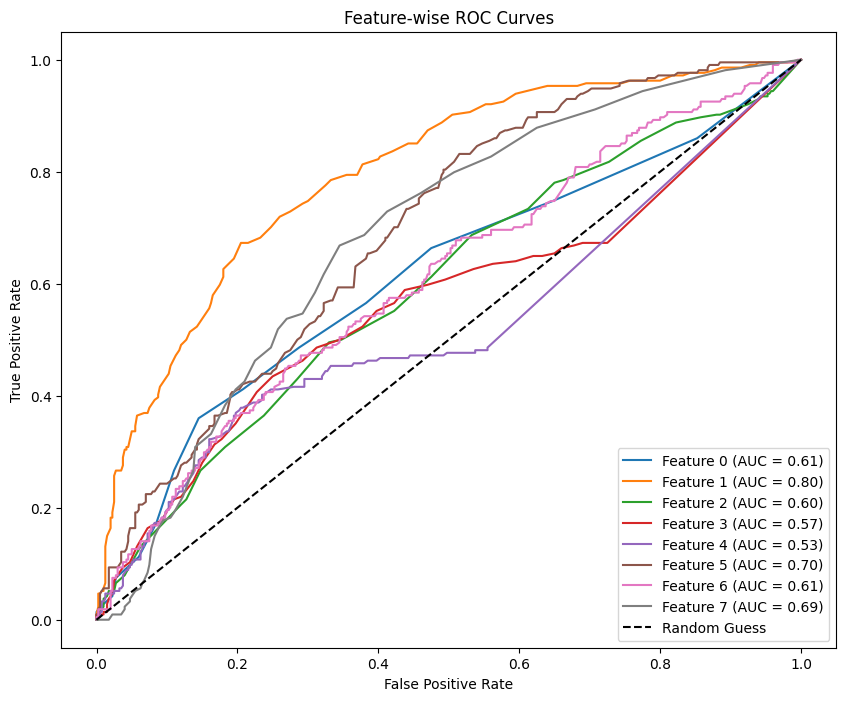

In [ ]:
from sklearn.metrics import roc_curve, auc
import numpy as np

plt.figure(figsize=(10, 8))
for i in range(X_train.shape[1]):
    fpr, tpr, _ = roc_curve(y_train, X_train[:, i])  # Compute ROC curve
    roc_auc = auc(fpr, tpr)  # Compute AUC
    plt.plot(fpr, tpr, label=f'Feature {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Feature-wise ROC Curves')
plt.legend(loc='lower right')
plt.show()


In [ ]:
diabetes_dataset = diabetes_dataset.drop(columns='Insulin',axis=1)
diabetes_dataset = diabetes_dataset.drop(columns=['SkinThickness'],axis=1)

In [ ]:

from sklearn.linear_model import LogisticRegression

# Create and fit a logistic regression model
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=42)

Model Evaluation

Accuracy Score

In [ ]:
#accuracy score on the training data
X_train_prediction = classifier.predict(X_train) #use the model (classifier)to predict the lables
training_data_accuracy = accuracy_score(X_train_prediction,y_train)

In [ ]:
print('Accuracy score of the training data ',training_data_accuracy)

Accuracy score of the training data  0.7850162866449512


In [ ]:
#accuracy score on the training data
X_test_prediction = classifier.predict(X_test) #use the model (classifier)to predict the lables
test_data_accuracy = accuracy_score(X_test_prediction,y_test)

In [ ]:
print('Accuracy score of the test data ',test_data_accuracy)

Accuracy score of the test data  0.7597402597402597


In [ ]:

# Initialize an empty list to store AUC scores
feature_auc_scores = []

# Compute AUC for each feature
for i in range(X_train.shape[1]):
    # Compute ROC curve and AUC for each feature
    fpr, tpr, _ = roc_curve(y_train, X_train[:, i])
    roc_auc = auc(fpr, tpr)
    feature_auc_scores.append(roc_auc)

    # Print AUC for each feature
    print(f'Feature {i} AUC: {roc_auc:.2f}')

# Define AUC threshold (e.g., only select features with AUC > 0.7)
threshold = 0.6
selected_features = [i for i, auc_score in enumerate(feature_auc_scores) if auc_score > threshold]

# Print the selected features based on the AUC threshold
print(f'Selected features with AUC > {threshold}: {selected_features}')

# Filter the features based on selected indices
X_train_selected = X_train[:, selected_features]
X_test_selected = X_test[:, selected_features]

# Create and fit a logistic regression model using only selected features
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train_selected, y_train)

# Optionally, evaluate the model on test data
accuracy = classifier.score(X_test_selected, y_test)
print(f'Model accuracy using selected features: {accuracy:.2f}')


Feature 0 AUC: 0.61
Feature 1 AUC: 0.80
Feature 2 AUC: 0.60
Feature 3 AUC: 0.57
Feature 4 AUC: 0.53
Feature 5 AUC: 0.70
Feature 6 AUC: 0.61
Feature 7 AUC: 0.69
Selected features with AUC > 0.6: [0, 1, 5, 6, 7]
Model accuracy using selected features: 0.76


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Set up hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'saga'],  # Solvers to try
    'max_iter': [100, 200, 500]  # Number of iterations
}

# Create Logistic Regression model
logreg = LogisticRegression(random_state=42)

# Use GridSearchCV to find best hyperparameters
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)
grid_search.fit(X_train[:, selected_features], y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f'Best hyperparameters: {best_params}')

# Re-train the model using the best parameters
best_model = grid_search.best_estimator_
accuracy_best = best_model.score(X_test[:, selected_features], y_test)
print(f'Accuracy with best hyperparameters: {accuracy_best:.2f}')


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import numpy as np


# Compute AUC for each feature and store AUC scores
feature_auc_scores = []

for i in range(X_train.shape[1]):
    fpr, tpr, _ = roc_curve(y_train, X_train[:, i])
    roc_auc = auc(fpr, tpr)
    feature_auc_scores.append(roc_auc)

# Print AUC scores for each feature
for i, auc_score in enumerate(feature_auc_scores):
    print(f'Feature {i} AUC: {auc_score:.2f}')

# Define AUC threshold (e.g., only select features with AUC > 0.6)
threshold = 0.6
selected_features = [i for i, auc_score in enumerate(feature_auc_scores) if auc_score > threshold]

# Print selected features based on the AUC threshold
print(f'Selected features with AUC > {threshold}: {selected_features}')

# Filter the selected features from the dataset
X_train_selected = X_train[:, selected_features]
X_test_selected = X_test[:, selected_features]

# Apply polynomial feature transformation
poly = PolynomialFeatures(degree=2)  # You can adjust the degree (2 for quadratic, etc.)
X_train_poly = poly.fit_transform(X_train_selected)
X_test_poly = poly.transform(X_test_selected)

# Create and fit a logistic regression model using polynomial features
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train_poly, y_train)

# Evaluate the model using the test data
y_pred = classifier.predict(X_test_poly)
accuracy = accuracy_score(y_test, y_pred)
print(f'Model accuracy with polynomial features: {accuracy:.2f}')


Feature 0 AUC: 0.61
Feature 1 AUC: 0.80
Feature 2 AUC: 0.60
Feature 3 AUC: 0.55
Feature 4 AUC: 0.54
Feature 5 AUC: 0.71
Feature 6 AUC: 0.60
Feature 7 AUC: 0.71
Selected features with AUC > 0.6: [0, 1, 2, 5, 7]
Model accuracy with polynomial features: 0.74


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve, auc
import numpy as np

# Assume you already have X_train, X_test, y_train, and y_test prepared

# Compute AUC for each feature and store AUC scores
feature_auc_scores = []

for i in range(X_train.shape[1]):
    fpr, tpr, _ = roc_curve(y_train, X_train[:, i])
    roc_auc = auc(fpr, tpr)
    feature_auc_scores.append(roc_auc)

# Print AUC scores for each feature
for i, auc_score in enumerate(feature_auc_scores):
    print(f'Feature {i} AUC: {auc_score:.2f}')

# Define AUC threshold (e.g., only select features with AUC > 0.6)
threshold = 0.6
selected_features = [i for i, auc_score in enumerate(feature_auc_scores) if auc_score > threshold]

# Print selected features based on the AUC threshold
print(f'Selected features with AUC > {threshold}: {selected_features}')

# Filter the selected features from the dataset
X_train_selected = X_train[:, selected_features]
X_test_selected = X_test[:, selected_features]

# Apply polynomial feature transformation
poly = PolynomialFeatures(degree=2)  # You can adjust the degree (2 for quadratic, etc.)
X_train_poly = poly.fit_transform(X_train_selected)
X_test_poly = poly.transform(X_test_selected)

# Set up hyperparameter grid for logistic regression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'saga'],  # Solvers to try
    'max_iter': [100, 200, 500]  # Number of iterations
}

# Create Logistic Regression model
logreg = LogisticRegression(random_state=42)

# Use GridSearchCV to find best hyperparameters
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)
grid_search.fit(X_train_poly, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f'Best hyperparameters: {best_params}')

# Re-train the model using the best parameters
best_model = grid_search.best_estimator_

# Evaluate the model using the test data
y_pred = best_model.predict(X_test_poly)
accuracy_best = accuracy_score(y_test, y_pred)
print(f'Accuracy with best hyperparameters: {accuracy_best:.2f}')


In [ ]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression



# Split the dataset into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------------
# 2. Define and Fit Individual Best Models
# ---------------------------
# Define the best individual models with the chosen parameters.
log_reg = LogisticRegression(C=1, penalty='l1', solver='liblinear')


# Fit each individual model.
log_reg.fit(X_train, y_train)






# ---------------------------
# 4. Evaluate the Models
# ---------------------------
def evaluate_model(model_name, y_true, y_pred, X_train, y_train):
    print(f"\n📌 {model_name} Accuracy (Train): {accuracy_score(y_train, model_name.predict(X_train)):.4f}")
    print(f"📌 {model_name} Accuracy (Test): {accuracy_score(y_true, y_pred):.4f}")

    print("Confusion Matrix (Train):")
    print(confusion_matrix(y_train, model_name.predict(X_train)))
    print("Confusion Matrix (Test):")
    print(confusion_matrix(y_true, y_pred))

    print("Classification Report (Train):")
    print(classification_report(y_train, model_name.predict(X_train)))
    print("Classification Report (Test):")
    print(classification_report(y_true, y_pred))



print("\nEvaluating Individual Models:")
# Evaluate individually fitted models:
evaluate_model(log_reg, y_test, log_reg.predict(X_test), X_train, y_train)



Evaluating Individual Models:

📌 LogisticRegression(C=1, penalty='l1', solver='liblinear') Accuracy (Train): 0.7646
📌 LogisticRegression(C=1, penalty='l1', solver='liblinear') Accuracy (Test): 0.8219
Confusion Matrix (Train):
[[339  44]
 [ 93 106]]
Confusion Matrix (Test):
[[84 11]
 [15 36]]
Classification Report (Train):
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       383
           1       0.71      0.53      0.61       199

    accuracy                           0.76       582
   macro avg       0.75      0.71      0.72       582
weighted avg       0.76      0.76      0.76       582

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.85      0.88      0.87        95
           1       0.77      0.71      0.73        51

    accuracy                           0.83       146
   macro avg       0.81      0.80      0.80       146
weighted avg       0.82      0.82      0.82       146